## Coordinates to Zones conversation

In [8]:
import shapefile
import matplotlib.path as mplPath
import numpy as np

sf = shapefile.Reader("zones/taxi_zones")
shapes = sf.shapes()
records = sf.records()

from pyproj import Proj
pnyc = Proj(
    proj='lcc',
    datum='NAD83',
    lat_1=40.66666666666666,
    lat_2=41.03333333333333,
    lat_0=40.16666666666666,
    lon_0=-74.0,
    x_0=984250.0/3.2808399,
    y_0=0.0)

all_poly=[]
for i in range(len(shapes)):
    projected_points = []
    for p in shapes[i].points:
        lon, lat = pnyc(p[0]/ 3.2808399, p[1]/3.2808399, inverse=True)
        projected_points.append((lon,lat))
    all_poly.append((records[i][0],mplPath.Path(projected_points)))
import pickle
pickle.dump(all_poly,open('scripts/zones.pickle','wb'))


## Zones to Coordinates Conversation
Mean of polygon points are calculated and plotted

In [10]:
import pickle

a = pickle.load(open('scripts/zones.pickle','rb'))
res = []
for aa in a:
    res.append(map(float,aa[1].vertices.mean(0)))
pickle.dump(res,open('scripts/zones_mean.pickle','wb'))

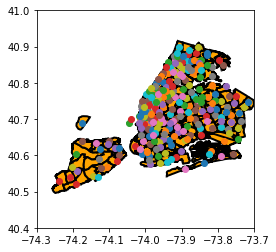

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.patches as patches

fig = plt.figure()
ax = fig.add_subplot(111)
for aa in a:
    patch = patches.PathPatch(aa[1], facecolor='orange', lw=2)
    ax.add_patch(patch)
    mm =  aa[1].vertices.mean(0)
    ax.scatter(mm[0], mm[1],zorder=10)
    ax.set_xlim(-74.3,-73.7)
    ax.set_ylim(40.4,41)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('destination_path.jpg', format='jpg', dpi=1000)
plt.show()
